### Label Encoding 

Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data.

Label encoding involves assigning a unique numerical label to each category in the variable. The labels are usually assigned in alphabetical order or based on the frequency of the categories. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using label encoding as follows:

1. Red: 2
2. Green: 1
3. Blue: 0

0,1,2 is based on the alphabeticaal order

In [1]:
import pandas as pd

df=pd.DataFrame({"color":["red","green","red","blue","green","yellow","red","blue"]})

In [2]:
df

,color
0,red
1,green
2,red
3,blue
4,green
5,yellow
6,red
7,blue


In [3]:
df["color"].unique()

array(['red', 'green', 'blue', 'yellow'], dtype=object)

In [4]:
df["color"].value_counts()

color
red       3
green     2
blue      2
yellow    1
Name: count, dtype: int64

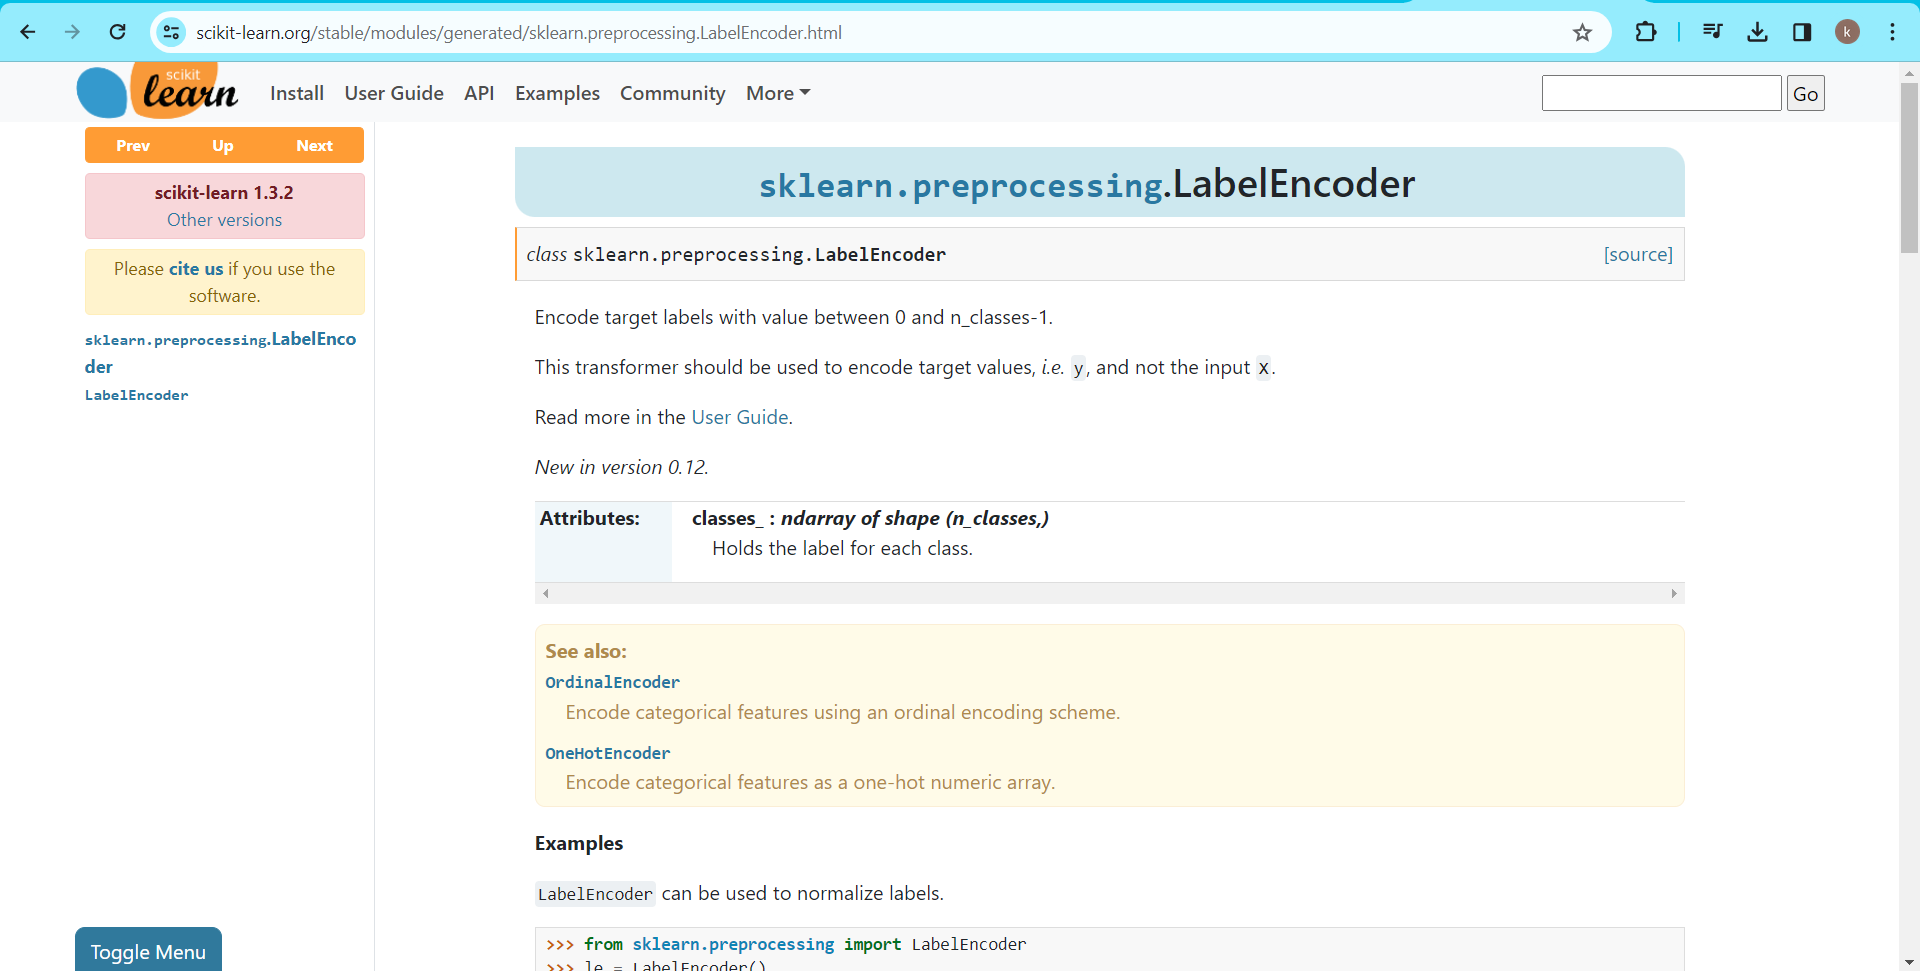


Encode target labels with value between 0 and n_classes-1.

In [5]:
df

,color
0,red
1,green
2,red
3,blue
4,green
5,yellow
6,red
7,blue


In [6]:
df["color"].value_counts()

color
red       3
green     2
blue      2
yellow    1
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [8]:
le.fit_transform(df["color"])

# encoding was done based on the alphabetical order 

# i,e blue --> b -->0
# green --> g--> 1
# red --> r --> 2
# yellow --> y --> 3

array([2, 1, 2, 0, 1, 3, 2, 0])

In [9]:
# Trnasforming new data using transform method

le.transform(["red"])

array([2])

In [10]:
le.transform(["yellow"])

array([3])

#### Disasvantage:
    
As we are converting the nominal categorical values into numerical values like 0,1,2,3... Our ML model thinks like the category which is converted to 3 has greater impact as compared to 0,1,2 and it will give more importance to 3. So obviously, it is not a correct assumption as every category has same level of impact in real life.

As the label encoder encoded yellow into 3, the model thinks that yellow is more important than other colors

like yellow> red, yellow> blue --> It may not be correct

Red,yellow,blue, green are belongs to nominal categories and having same impact.

If we want to assign the rank for each category according to problem statement then on that case we will use label encoder.

### Ordinal Encoding

It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is assigned a numerical value based on its position in the order. For example, if we have a categorical variable "education level" with four possible values (high school, college, graduate, post-graduate), we can represent it using ordinal encoding as follows:

1. High school: 1
2. College: 2
3. Graduate: 3
4. Post-graduate: 4

In [11]:
# create a sample dataframe with an ordinal variable
df = pd.DataFrame({
    'education': ['High school', 'Graduate', 'College', 'Post Graduate', 'High school', 'College']
})

In [12]:
df

,education
0,High school
1,Graduate
2,College
3,Post Graduate
4,High school
5,College


In [13]:
df["education"].unique()

array(['High school', 'Graduate', 'College', 'Post Graduate'],
      dtype=object)

In [14]:
df.education.value_counts()

education
High school      2
College          2
Graduate         1
Post Graduate    1
Name: count, dtype: int64

In [15]:
## Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder

In [16]:
oe=OrdinalEncoder(categories=[['High school', 'College', 'Graduate', 'Post Graduate']])

# we provided the order of categorical values from low ---> high rank, based on this ordinal encoder will convert the data into
# numerical feature.

In [17]:
oe.fit_transform(df[["education"]])

# As you can observe, ordinal values are converted according to our predefined sequence 

# "oe=OrdinalEncoder(categories=[['High school', 'College', 'Graduate', 'Post Graduate']])"

# High school --> 0
# college --> 1
# graduate --> 2
# post graduate --> 3

array([[0.],
       [2.],
       [1.],
       [3.],
       [0.],
       [1.]])

In [18]:
df["education"]

0      High school
1         Graduate
2          College
3    Post Graduate
4      High school
5          College
Name: education, dtype: object

In [19]:
# transforming the new data

oe.transform([["High school"]])

C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

In [20]:
oe.transform([["College"]])

C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[1.]])